Buisness Problem: The bank wants to predict which companies will default on their loans based on their financial information.


Goal:
To predict whether the customer will fall under default or not

In [2]:
#Importing library
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime


In [3]:
#Read the file 
df_loan = pd.read_csv("Bank_final.csv",low_memory=False)

In [4]:
#seeing the dimension of the data
df_loan.shape

(149999, 27)

In [5]:
# seeing the name of the variable in the dataset
df_loan.columns

Index(['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'CCSC',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'Default'],
      dtype='object')

In [6]:
df_loan.head()

,Name,City,State,Zip,Bank,BankState,CCSC,ApprovalDate,ApprovalFY,Term,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Default
0,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,...,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",0
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,...,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",0
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,...,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00",0
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,...,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00",0
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,...,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00",0


In [7]:
# variable identification
df_loan.dtypes

Name                 object
City                 object
State                object
Zip                   int64
Bank                 object
BankState            object
CCSC                  int64
ApprovalDate         object
ApprovalFY            int64
Term                  int64
NoEmp                 int64
NewExist              int64
CreateJob             int64
RetainedJob           int64
FranchiseCode         int64
UrbanRural            int64
RevLineCr            object
LowDoc               object
ChgOffDate           object
DisbursementDate     object
DisbursementGross    object
BalanceGross         object
MIS_Status           object
ChgOffPrinGr         object
GrAppv               object
SBA_Appv             object
Default               int64
dtype: object

In [8]:
# Now Perform Bivariate analysis on continous variable

# using describe function on the continous variables
df_loan.describe()

,Zip,CCSC,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,Default
count,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000
mean,49849.046527,401567.535270,2002.302889,93.010887,9.313749,1.319535,1.278455,3.685918,1655.999787,0.767905,0.334189
std,31159.635854,256946.069805,5.212507,69.306154,78.956632,0.468125,10.958749,27.679464,9956.791183,0.633091,0.471708
min,0.000000,0.000000,1962.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20854.000000,236118.000000,1998.000000,57.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48053.000000,447110.000000,2005.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,80003.000000,561612.000000,2006.000000,84.000000,8.000000,2.000000,0.000000,4.000000,1.000000,1.000000,1.000000
max,99999.000000,928120.000000,2007.000000,480.000000,9999.000000,2.000000,3000.000000,9500.000000,91999.000000,2.000000,1.000000


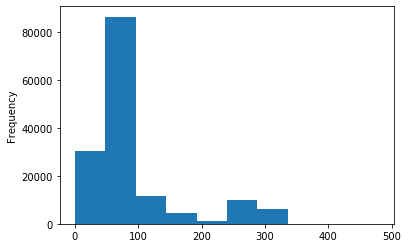

In [9]:
# plotting a histogram 

df_loan['Term'].plot.hist()

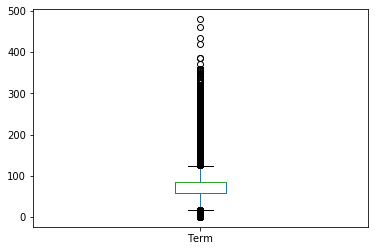

In [10]:
# plotting a box plot 

df_loan['Term'].plot.box()  

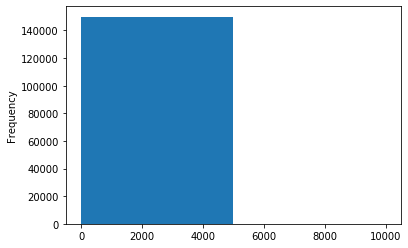

In [11]:
df_loan['NoEmp'].plot.hist(bins=2)

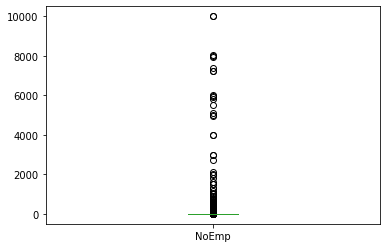

In [12]:
df_loan['NoEmp'].plot.box()

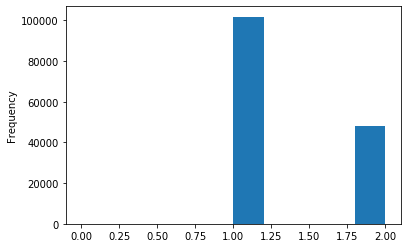

In [13]:
df_loan['NewExist'].plot.hist()

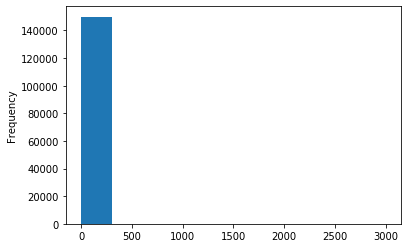

In [14]:
df_loan['CreateJob'].plot.hist()

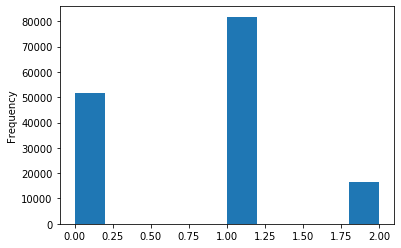

In [15]:
df_loan['UrbanRural'].plot.hist()

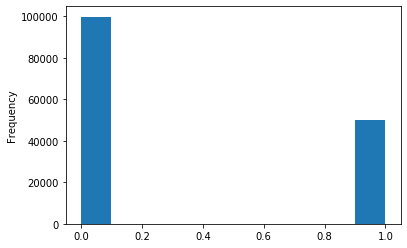

In [16]:
df_loan['Default'].plot.hist()

In [17]:
# performing bivarite analysis on Discrete variables

#I create a function that help me to identify variales
def column_analysis(x,df = df_loan): #print count for columns that only has few uniques
    print(df[x].value_counts(),"\n",df[x].value_counts()/len(df[x]))


In [18]:
column_analysis('Name')

SUBWAY                            78
SCHLOTZSKY'S DELI                 39
QUIZNO'S CLASSIC SUBS             37
DOMINO'S PIZZA                    36
DAIRY QUEEN                       32
CICI'S PIZZA                      31
DUNKIN DONUTS                     29
WEST TEXAS LEE CO INC             29
DAYS INN                          27
MAIL BOXES ETC.                   27
SUPER 8 MOTEL                     25
MAACO AUTO PAINTING & BODYWORK    25
FANTASTIC SAMS                    25
MATCO TOOLS                       25
QUIZNO'S                          24
COMPUTER RENAISSANCE              24
COLD STONE CREAMERY               23
GREAT CLIPS                       22
MAIL BOXES ETC                    21
MAIL BOXES, ETC.                  20
COMFORT INN                       19
PLAY IT AGAIN SPORTS              19
Meathead Movers, Inc.             16
HOLIDAY INN EXPRESS               15
MINUTEMAN PRESS                   15
QUIZNOS                           15
UNIFORMS FOR AMERICA              15
L

In [19]:
column_analysis('RevLineCr')

N    71611
Y    49881
0    23659
T     4819
1        3
`        2
,        1
Name: RevLineCr, dtype: int64 
 N    0.477410
Y    0.332542
0    0.157728
T    0.032127
1    0.000020
`    0.000013
,    0.000007
Name: RevLineCr, dtype: float64


In [20]:
column_analysis('LowDoc')

N    137871
Y     12044
C        83
1         1
Name: LowDoc, dtype: int64 
 N    0.919146
Y    0.080294
C    0.000553
1    0.000007
Name: LowDoc, dtype: float64


In [21]:
column_analysis('MIS_Status')

P I F     110123
CHGOFF     39008
Name: MIS_Status, dtype: int64 
 P I F     0.734158
CHGOFF    0.260055
Name: MIS_Status, dtype: float64


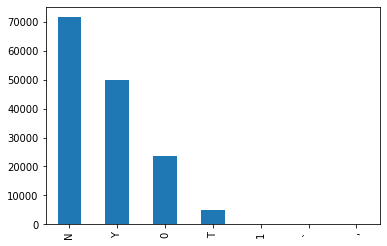

In [22]:
# Create a bar plot for frequencies
df_loan['RevLineCr'].value_counts().plot.bar()

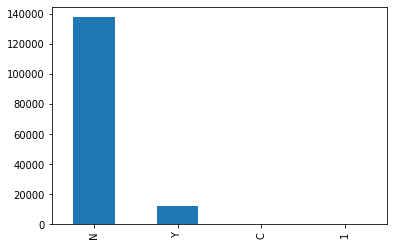

In [23]:
df_loan['LowDoc'].value_counts().plot.bar()

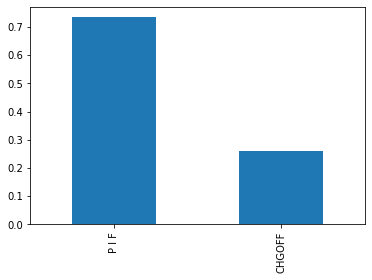

In [24]:
(df_loan['MIS_Status'].value_counts()/len(df_loan['MIS_Status'])).plot.bar()

In [25]:
# Continous - Continous Bivaruate analysis:

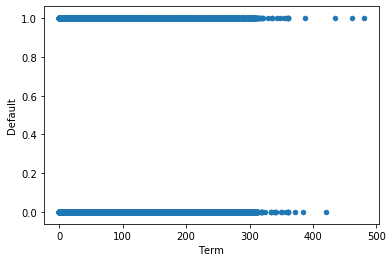

In [26]:
df_loan.plot.scatter('Term','Default')

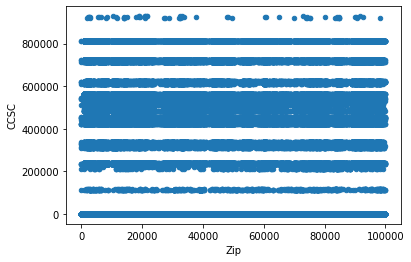

In [27]:
df_loan.plot.scatter('Zip','CCSC')# no relation

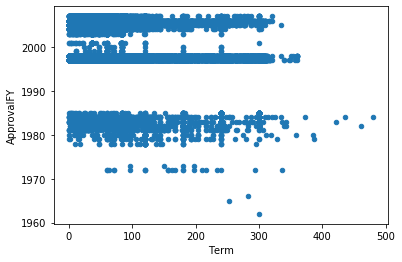

In [28]:
df_loan.plot.scatter('Term','ApprovalFY')   

In [29]:
df_loan.dtypes

Name                 object
City                 object
State                object
Zip                   int64
Bank                 object
BankState            object
CCSC                  int64
ApprovalDate         object
ApprovalFY            int64
Term                  int64
NoEmp                 int64
NewExist              int64
CreateJob             int64
RetainedJob           int64
FranchiseCode         int64
UrbanRural            int64
RevLineCr            object
LowDoc               object
ChgOffDate           object
DisbursementDate     object
DisbursementGross    object
BalanceGross         object
MIS_Status           object
ChgOffPrinGr         object
GrAppv               object
SBA_Appv             object
Default               int64
dtype: object

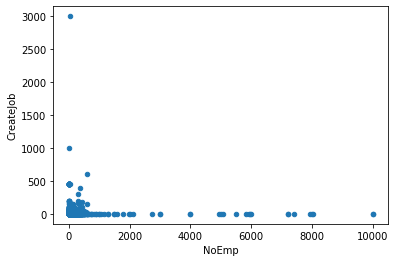

In [30]:
df_loan.plot.scatter('NoEmp','CreateJob')   

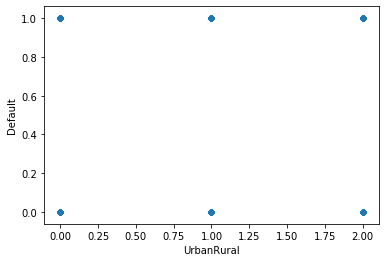

In [31]:
df_loan.plot.scatter('UrbanRural','Default')   

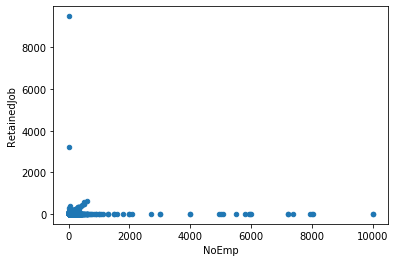

In [32]:
df_loan.plot.scatter('NoEmp','RetainedJob')   

In [33]:
df_loan.corr()   # check correlation matrix 

,Zip,CCSC,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,Default
Zip,1.000000,-0.071785,-0.095580,0.148118,0.014771,-0.079057,0.014648,-0.000395,0.018416,-0.110019,0.001039
CCSC,-0.071785,1.000000,0.579349,-0.259663,-0.040582,0.044601,0.019404,0.046389,-0.056478,0.500575,-0.002584
ApprovalFY,-0.095580,0.579349,1.000000,-0.447960,-0.069961,0.027610,0.028481,0.067419,-0.076650,0.749811,-0.002216
Term,0.148118,-0.259663,-0.447960,1.000000,0.047236,-0.062044,0.056612,-0.004901,0.065750,-0.385952,-0.002218
NoEmp,0.014771,-0.040582,-0.069961,0.047236,1.000000,-0.028583,0.023257,0.033384,0.006650,-0.053505,-0.000495
NewExist,-0.079057,0.044601,0.027610,-0.062044,-0.028583,1.000000,0.013822,-0.029635,0.076829,0.026416,-0.009380
CreateJob,0.014648,0.019404,0.028481,0.056612,0.023257,0.013822,1.000000,0.048554,0.011896,0.018583,-0.002029
RetainedJob,-0.000395,0.046389,0.067419,-0.004901,0.033384,-0.029635,0.048554,1.000000,-0.003583,0.058434,-0.001216
FranchiseCode,0.018416,-0.056478,-0.076650,0.065750,0.006650,0.076829,0.011896,-0.003583,1.000000,-0.083914,-0.000525
UrbanRural,-0.110019,0.500575,0.749811,-0.385952,-0.053505,0.026416,0.018583,0.058434,-0.083914,1.000000,-0.004343


In [34]:
df_loan.groupby('DisbursementGross')['Default'].mean()  # Most are of 0 

DisbursementGross
$0.00             0.267857
$1,000,000.00     0.332155
$1,000,050.00     0.000000
$1,000.00         0.337838
$1,001,000.00     0.333333
$1,002,000.00     1.000000
$1,003,000.00     0.000000
$1,003,161.00     0.000000
$1,005,000.00     0.000000
$1,005,072.00     1.000000
$1,005,902.00     0.000000
$1,006,300.00     0.000000
$1,006,400.00     0.000000
$1,007,000.00     0.000000
$1,008,000.00     0.000000
$1,010,000.00     0.250000
$1,011,000.00     1.000000
$1,011,695.00     0.000000
$1,011,978.00     0.000000
$1,012,000.00     0.000000
$1,012,500.00     0.000000
$1,013,000.00     0.000000
$1,014,000.00     0.000000
$1,014,500.00     0.000000
$1,014,800.00     0.000000
$1,014.00         0.500000
$1,015,000.00     0.000000
$1,015,500.00     1.000000
$1,015.00         0.000000
$1,016,000.00     1.000000
                    ...   
$99,987.00        1.000000
$99,989.00        0.000000
$99,990.00        1.000000
$99,993.00        0.000000
$99,994.00        1.000000
$99,995.00

In [35]:
df_loan.groupby('Name')['Default'].mean().value_counts()# much are non default'ies 

0.000000    92027
1.000000    45440
0.500000     2961
0.333333      214
0.666667       91
0.250000       36
0.200000       16
0.400000       15
0.166667       11
0.600000        9
0.750000        9
0.428571        5
0.375000        4
0.571429        4
0.142857        3
0.300000        3
0.125000        2
0.444444        2
0.259259        2
0.533333        2
0.307692        2
0.310345        1
0.277778        1
0.181818        1
0.520000        1
0.066667        1
0.354839        1
0.285714        1
0.222222        1
0.360000        1
0.320000        1
0.111111        1
0.800000        1
0.157895        1
0.357143        1
0.269231        1
0.137931        1
0.378378        1
0.476190        1
0.363636        1
0.291667        1
0.526316        1
0.272727        1
0.478261        1
0.583333        1
0.256410        1
Name: Default, dtype: int64

In [36]:
df_loan.groupby('RevLineCr')['Default'].mean() # it much tell abt revline and default rate value have 0 

RevLineCr
,    0.000000
0    0.335517
1    0.000000
N    0.335647
T    0.322474
Y    0.332612
`    0.000000
Name: Default, dtype: float64

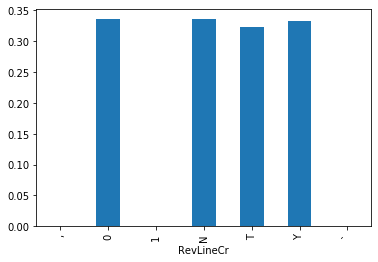

In [37]:
df_loan.groupby('RevLineCr')['Default'].mean().plot.bar()

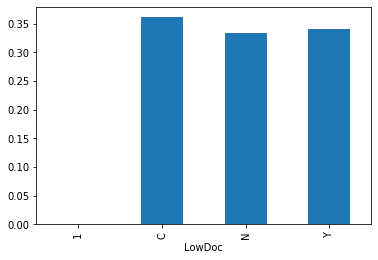

In [38]:
df_loan.groupby('LowDoc')['Default'].mean().plot.bar()

In [39]:
pd.crosstab(df_loan['Default'],df_loan['MIS_Status'])

MIS_Status,CHGOFF,P I F
Default,,
0,25969,73312
1,13039,36811


# Now checking the Null Values


There are are many missing value in a data set

In [40]:
df_loan.isna().sum()

Name                      8
City                      1
State                     2
Zip                       0
Bank                    147
BankState               148
CCSC                      0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                23
LowDoc                    0
ChgOffDate           109533
DisbursementDate        225
DisbursementGross         0
BalanceGross              0
MIS_Status              868
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
Default                   0
dtype: int64

 Convert some variables that are categorical in nature : RevLineCr,LowDoc,Mis-Status
 

In [41]:
# Function that map value 
class_map = {'Y': 1, 'N': 0}

In [42]:
df_loan['RevLineCr'] = df_loan['RevLineCr'].map(class_map)

In [43]:
df_loan['RevLineCr'].value_counts()   # Now It covert to integer

0.0    71611
1.0    49881
Name: RevLineCr, dtype: int64

In [44]:
df_loan['LowDoc'].value_counts()

N    137871
Y     12044
C        83
1         1
Name: LowDoc, dtype: int64

In [45]:
# Function that map Low Doc value 
class_map1 = {'Y': 1, 'N': 0}

In [46]:
df_loan['LowDoc'] = df_loan['LowDoc'].map(class_map1) #

In [47]:
# function that map Mis-Status
class_map2 = {'P I F': 1, 'CHGOFF': 0}

In [48]:
df_loan['MIS_Status'] = df_loan['MIS_Status'].map(class_map2)

In [49]:
df_loan['MIS_Status'].value_counts() # 

1.0    110123
0.0     39008
Name: MIS_Status, dtype: int64

In [50]:
df_data = df_loan.copy()

In [51]:
df_loan['RevLineCr'].fillna(0, inplace=True)

df_loan['LowDoc'].fillna(0, inplace=True)

df_loan['MIS_Status'].fillna(0, inplace=True)


In [52]:
df_loan = df_loan.fillna(df_loan.mode().iloc[0])

In [53]:
df_data = df_loan.copy()

# Feature Engineering

In [55]:
# Apply lambda function to Disbursement Gross then it will convert to float and replace its ($),(,) by ('')

In [56]:
df_loan['DisbursementGross'] = df_loan['DisbursementGross'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)

In [57]:
#1 to 25000,25000 to 50000 , 50000 to 93208,93208 to 190000 ,190000 to 4029520

In [58]:
df_data['BalanceGross'] = df_data['BalanceGross'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)

In [59]:
df_data['DisbursementGross'] = df_data['DisbursementGross'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)

In [60]:
df_data['SBA_Appv'] = df_data['SBA_Appv'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)

In [61]:
df_data['GrAppv'] = df_data['GrAppv'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)

In [62]:
df_data['ChgOffPrinGr'] = df_data['ChgOffPrinGr'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)

In [63]:
df_data['ApprovalDate'] = pd.to_datetime(df_data['ApprovalDate'], format='%d-%b-%y').dt.strftime('%Y')


In [64]:
df_data['ApprovalDate'].value_counts()

2006    49413
2005    37024
1997    32224
1998    14365
2004    11427
1983     1780
1984     1716
1982      714
2003      370
1981      336
1980      273
2001       98
1979       81
1978       63
1999       33
2000       30
2002       21
1972       19
1971        8
1996        1
2064        1
2061        1
2066        1
Name: ApprovalDate, dtype: int64

In [65]:
df_data['DisbursementDate'] = pd.to_datetime(df_data['DisbursementDate'], format='%d-%b-%y').dt.strftime('%Y')

In [66]:
df_data['DisbursementDate'].value_counts()

2006    51579
2005    33193
1998    21011
1997    20981
2004     8552
1999     3390
2007     2744
1984     1880
2008     1192
1983     1112
2000      823
2009      811
1985      692
1982      421
1981      332
2001      319
2003      294
1980      199
2002      183
1979       86
1986       86
1978       42
2010       27
1972       16
2012       10
1987        8
1971        5
1973        3
1988        2
1996        1
2013        1
1995        1
2048        1
2066        1
2011        1
Name: DisbursementDate, dtype: int64

In [67]:
df_data['ChgOffDate'] = pd.to_datetime(df_data['ChgOffDate'], format='%d-%b-%y').dt.strftime('%Y')

In [68]:
df_data['ApprovalFY'].value_counts()

2006    55361
2005    33547
1997    23838
1998    22736
2004     5552
2007     3536
1984     1993
1983     1608
1982      529
1981      407
2003      259
1985      151
1980      138
2001      100
1979       99
1999       43
1978       38
2000       34
1972       23
1973        4
1966        1
1965        1
1962        1
Name: ApprovalFY, dtype: int64

In [69]:
df_data['CCSC']=np.where(df_data['CCSC'] =='0', 0, df_data['CCSC'])
df_data['CCSC']=np.where(df_data['CCSC'] > 1, 1, df_data['CCSC'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [70]:
#df_data['Term'] = pd.qcut(df_data['Term'], 5, 
 #                                  labels=['1_to_47', '47 to 72', '72 to 84','84 to 120' , '120 to 480'])


In [71]:
#df_data['DisbursementGross'] = pd.qcut(df_data['DisbursementGross'], 5, 
 #                                  labels=['1 to 25000','25000 to 50000' , '50000 to 93208','93208 to 190000' ,'190000 to 4029520'])

In [72]:
#df_data['BalanceGross'] = pd.qcut(df_data['BalanceGross'], 1, 
#                                   labels=['1_to_82785'])

In [73]:
#df_data['SBA_Appv'] = pd.qcut(df_data['SBA_Appv'], 5, 
#                                   labels=['99 to 12500' ,'12500 to 24000','24000 to 45000','45000_to _120000','120000_to_4000000'])

In [74]:
##df_data['GrAppv'] = pd.qcut(df_data['GrAppv'], 5, 
  #                                 labels=['199 to 20600','20600 to 40000 ','40000 to 75000' ,'75000 to 158000' ,'158000 to 4000000'])

In [75]:
#df_data['ChgOffPrinGr'] = pd.qcut(df_data['ChgOffPrinGr'], 1, 
 #                                  labels=['0_to_208959'])

In [76]:
df_data.shape

(149999, 27)

In [77]:
# split target and features
df_data.columns

Index(['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'CCSC',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'Default'],
      dtype='object')

In [78]:
x = df_data[['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'CCSC',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
        'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']]
y = df_data['MIS_Status']

In [79]:
df_data1 = df_data.copy()

In [80]:
from xverse.feature_subset import FeatureSubset

numerical_features = list(df_data1._get_numeric_data().columns)
categorical_features = list(df_data1.columns.difference(numerical_features))
print(numerical_features)

clf = FeatureSubset(numerical_features) #select only numeric features
df = clf.fit_transform(df_data1) #returns the dataframe with selected features

['Zip', 'CCSC', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'Default']


In [81]:
from xverse.feature_subset import SplitXY

clf = SplitXY(['MIS_Status']) #Split the dataset into X and y
X, y = clf.fit_transform(df) #returns features (X) dataset and target(Y) as a numpy array

In [82]:
from xverse.transformer import MonotonicBinning

clf = MonotonicBinning()
clf.fit(X, y)

MonotonicBinning(cardinality_cutoff=5, custom_binning=None, feature_names='all',
                 force_bins=4, max_bins=20, prefix=None)

In [83]:
clf.bins

{'ApprovalFY': array([1962., 1998., 2006., 2007.]),
 'BalanceGross': array([     0.,  12750., 827875.]),
 'CCSC': array([0., 1.]),
 'ChgOffPrinGr': array([0.000000e+00, 1.000000e+00, 1.999999e+06]),
 'CreateJob': array([0.e+00, 1.e+00, 3.e+03]),
 'Default': array([0., 1.]),
 'DisbursementGross': array([      0.        ,   41291.33333333,  101703.66666667,
        4029520.        ]),
 'FranchiseCode': array([0.0000e+00, 1.0000e+00, 9.1999e+04]),
 'GrAppv': array([2.e+02, 3.e+04, 1.e+05, 4.e+06]),
 'LowDoc': array([0., 1.]),
 'NewExist': array([0., 1., 2.]),
 'NoEmp': array([0.000e+00, 2.000e+00, 6.000e+00, 9.999e+03]),
 'RetainedJob': array([0.0e+00, 2.0e+00, 9.5e+03]),
 'RevLineCr': array([0., 1.]),
 'SBA_Appv': array([1.000e+02, 1.750e+04, 5.025e+04, 4.000e+06]),
 'Term': array([  0.,  60.,  84., 480.]),
 'UrbanRural': array([0., 1., 2.]),
 'Zip': array([    0., 31763., 70601., 99999.])}

In [84]:
output_bins = clf.bins #will be used later in this exercise

In [85]:
out_X = clf.transform(X)

In [86]:

out_X.head()

,ApprovalFY,BalanceGross,CCSC,ChgOffPrinGr,CreateJob,Default,DisbursementGross,FranchiseCode,GrAppv,LowDoc,NewExist,NoEmp,RetainedJob,RevLineCr,SBA_Appv,Term,UrbanRural,Zip
0,"(1961.999, 1998.0]",0.0,1,"(-0.001, 1.0]","(-0.001, 1.0]",0,"(41291.333, 101703.667]","(-0.001, 1.0]","(30000.0, 100000.0]",1.0,2,"(2.0, 6.0]","(-0.001, 2.0]",0.0,"(17500.0, 50250.0]","(60.0, 84.0]",0,"(31763.0, 70601.0]"
1,"(1961.999, 1998.0]",0.0,1,"(-0.001, 1.0]","(-0.001, 1.0]",0,"(-0.001, 41291.333]","(-0.001, 1.0]","(30000.0, 100000.0]",1.0,2,"(-0.001, 2.0]","(-0.001, 2.0]",0.0,"(17500.0, 50250.0]","(-0.001, 60.0]",0,"(31763.0, 70601.0]"
2,"(1961.999, 1998.0]",0.0,1,"(-0.001, 1.0]","(-0.001, 1.0]",0,"(101703.667, 4029520.0]","(-0.001, 1.0]","(100000.0, 4000000.0]",0.0,1,"(6.0, 9999.0]","(-0.001, 2.0]",0.0,"(50250.0, 4000000.0]","(84.0, 480.0]",0,"(31763.0, 70601.0]"
3,"(1961.999, 1998.0]",0.0,0,"(-0.001, 1.0]","(-0.001, 1.0]",0,"(-0.001, 41291.333]","(-0.001, 1.0]","(30000.0, 100000.0]",1.0,1,"(-0.001, 2.0]","(-0.001, 2.0]",0.0,"(17500.0, 50250.0]","(-0.001, 60.0]",0,"(70601.0, 99999.0]"
4,"(1961.999, 1998.0]",0.0,0,"(-0.001, 1.0]","(1.0, 3000.0]",0,"(101703.667, 4029520.0]","(-0.001, 1.0]","(100000.0, 4000000.0]",0.0,1,"(6.0, 9999.0]","(2.0, 9500.0]",0.0,"(50250.0, 4000000.0]","(84.0, 480.0]",0,"(31763.0, 70601.0]"


In [87]:
clf = MonotonicBinning(custom_binning=output_bins) #output_bins was created earlier

out_X = clf.transform(X)
out_X.head()

,ApprovalFY,BalanceGross,CCSC,ChgOffPrinGr,CreateJob,Default,DisbursementGross,FranchiseCode,GrAppv,LowDoc,NewExist,NoEmp,RetainedJob,RevLineCr,SBA_Appv,Term,UrbanRural,Zip
0,"(1961.999, 1998.0]",0.0,1,"(-0.001, 1.0]","(-0.001, 1.0]",0,"(41291.333, 101703.667]","(-0.001, 1.0]","(30000.0, 100000.0]",1.0,2,"(2.0, 6.0]","(-0.001, 2.0]",0.0,"(17500.0, 50250.0]","(60.0, 84.0]",0,"(31763.0, 70601.0]"
1,"(1961.999, 1998.0]",0.0,1,"(-0.001, 1.0]","(-0.001, 1.0]",0,"(-0.001, 41291.333]","(-0.001, 1.0]","(30000.0, 100000.0]",1.0,2,"(-0.001, 2.0]","(-0.001, 2.0]",0.0,"(17500.0, 50250.0]","(-0.001, 60.0]",0,"(31763.0, 70601.0]"
2,"(1961.999, 1998.0]",0.0,1,"(-0.001, 1.0]","(-0.001, 1.0]",0,"(101703.667, 4029520.0]","(-0.001, 1.0]","(100000.0, 4000000.0]",0.0,1,"(6.0, 9999.0]","(-0.001, 2.0]",0.0,"(50250.0, 4000000.0]","(84.0, 480.0]",0,"(31763.0, 70601.0]"
3,"(1961.999, 1998.0]",0.0,0,"(-0.001, 1.0]","(-0.001, 1.0]",0,"(-0.001, 41291.333]","(-0.001, 1.0]","(30000.0, 100000.0]",1.0,1,"(-0.001, 2.0]","(-0.001, 2.0]",0.0,"(17500.0, 50250.0]","(-0.001, 60.0]",0,"(70601.0, 99999.0]"
4,"(1961.999, 1998.0]",0.0,0,"(-0.001, 1.0]","(1.0, 3000.0]",0,"(101703.667, 4029520.0]","(-0.001, 1.0]","(100000.0, 4000000.0]",0.0,1,"(6.0, 9999.0]","(2.0, 9500.0]",0.0,"(50250.0, 4000000.0]","(84.0, 480.0]",0,"(31763.0, 70601.0]"


In [88]:
X = X.mask(np.random.random(X.shape) < .1)

In [89]:
out_X = clf.transform(X)
out_X.head()

,ApprovalFY,BalanceGross,CCSC,ChgOffPrinGr,CreateJob,Default,DisbursementGross,FranchiseCode,GrAppv,LowDoc,NewExist,NoEmp,RetainedJob,RevLineCr,SBA_Appv,Term,UrbanRural,Zip
0,NaN,0.0,NaN,"(-0.001, 1.0]","(-0.001, 1.0]",NaN,"(41291.333, 101703.667]",NaN,NaN,1.0,2.0,"(2.0, 6.0]","(-0.001, 2.0]",0.0,"(17500.0, 50250.0]","(60.0, 84.0]",0.0,"(31763.0, 70601.0]"
1,"(1961.999, 1998.0]",0.0,1.0,"(-0.001, 1.0]",NaN,0.0,"(-0.001, 41291.333]","(-0.001, 1.0]",NaN,1.0,2.0,"(-0.001, 2.0]","(-0.001, 2.0]",0.0,"(17500.0, 50250.0]","(-0.001, 60.0]",0.0,"(31763.0, 70601.0]"
2,"(1961.999, 1998.0]",0.0,1.0,NaN,"(-0.001, 1.0]",NaN,"(101703.667, 4029520.0]","(-0.001, 1.0]","(100000.0, 4000000.0]",0.0,1.0,"(6.0, 9999.0]","(-0.001, 2.0]",0.0,"(50250.0, 4000000.0]","(84.0, 480.0]",0.0,"(31763.0, 70601.0]"
3,"(1961.999, 1998.0]",0.0,0.0,"(-0.001, 1.0]","(-0.001, 1.0]",NaN,"(-0.001, 41291.333]","(-0.001, 1.0]","(30000.0, 100000.0]",1.0,1.0,"(-0.001, 2.0]","(-0.001, 2.0]",0.0,"(17500.0, 50250.0]","(-0.001, 60.0]",0.0,"(70601.0, 99999.0]"
4,"(1961.999, 1998.0]",0.0,0.0,"(-0.001, 1.0]","(1.0, 3000.0]",0.0,"(101703.667, 4029520.0]","(-0.001, 1.0]","(100000.0, 4000000.0]",0.0,1.0,"(6.0, 9999.0]","(2.0, 9500.0]",0.0,NaN,"(84.0, 480.0]",0.0,NaN


In [90]:

from xverse.transformer import WOE

clf = WOE()
clf.fit(X, y)

WOE(exclude_features=None, feature_names='all', mono_cardinality_cutoff=5,
    mono_custom_binning={'ApprovalFY': array([1962., 1998., 2006., 2007.]),
                         'BalanceGross': array([     0.,  12750., 827875.,     nan]),
                         'CCSC': array([ 0.,  1., nan]),
                         'ChgOffPrinGr': array([0.000000e+00, 1.000000e+00, 1.999999e+06]),
                         'CreateJob': array([0.e+00, 1.e+00, 3.e+03]),
                         'Default': array([ 0.,  1., nan]),
                         'Disb...
                       'NA': -0.011521674553624564},
              'UrbanRural': {0.0: 1.0843465442178053, 1.0: -0.4536845519684273,
                             2.0: -0.05812536276218578,
                             'NA': 0.024571509353740594},
              'Zip': {Interval(-0.001, 31709.0, closed='right'): 0.031234812409301874,
                      Interval(31709.0, 70582.0, closed='right'): -0.05530685716310654,
                      Inter

In [91]:

clf.woe_df.head(10)

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,ApprovalFY,"(1961.999, 1998.0]",46306,41344.0,4962.0,0.892843,0.107157,0.375435,0.124436,1.104295,0.379606
1,ApprovalFY,"(1998.0, 2006.0]",85414,55970.0,29444.0,0.655279,0.344721,0.508250,0.738389,-0.373498,0.379606
2,ApprovalFY,"(2006.0, 2007.0]",3149,1726.0,1423.0,0.548111,0.451889,0.015673,0.035686,-0.822784,0.379606
3,ApprovalFY,NA,15130,11083.0,4047.0,0.732518,0.267482,0.100642,0.101490,-0.008387,0.379606
4,BalanceGross,0,135097,99122.0,35975.0,0.733710,0.266290,0.900103,0.902172,-0.002296,0.000047
5,BalanceGross,12750,1,1.0,0.0,1.000000,0.000000,0.000009,0.000000,0.000000,0.000047
6,BalanceGross,827875,1,1.0,0.0,1.000000,0.000000,0.000009,0.000000,0.000000,0.000047
7,BalanceGross,NA,14900,10999.0,3901.0,0.738188,0.261812,0.099879,0.097828,0.020748,0.000047
8,CCSC,0,28637,24839.0,3798.0,0.867374,0.132626,0.225557,0.095245,0.862117,0.136143
9,CCSC,1,106245,74126.0,32119.0,0.697689,0.302311,0.673120,0.805472,-0.179505,0.136143


In [92]:
clf.iv_df

,Variable_Name,Information_Value
3,ChgOffPrinGr,7.149690
15,Term,1.115345
16,UrbanRural,0.380479
0,ApprovalFY,0.379606
14,SBA_Appv,0.197616
8,GrAppv,0.138999
2,CCSC,0.136143
9,LowDoc,0.106533
12,RetainedJob,0.089671
6,DisbursementGross,0.051155


In [93]:
df_data1.describe()

,Zip,CCSC,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Default
count,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,1.499990e+05,149999.000000,149999.000000,1.499990e+05,1.499990e+05,1.499990e+05,149999.000000
mean,49849.046527,0.787752,2002.302889,93.010887,9.313749,1.319535,1.278455,3.685918,1655.999787,0.767905,0.332542,0.080294,1.412937e+05,5.604204,0.734158,1.505716e+04,1.276918e+05,9.250016e+04,0.334189
std,31159.635854,0.408901,5.212507,69.306154,78.956632,0.468125,10.958749,27.679464,9956.791183,0.633091,0.471126,0.271749,2.185792e+05,2137.824451,0.441782,5.710400e+04,2.142117e+05,1.664169e+05,0.471708
min,0.000000,0.000000,1962.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,2.000000e+02,1.000000e+02,0.000000
25%,20854.000000,1.000000,1998.000000,57.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+04,0.000000,0.000000,0.000000e+00,2.500000e+04,1.250000e+04,0.000000
50%,48053.000000,1.000000,2005.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,6.550000e+04,0.000000,1.000000,0.000000e+00,5.000000e+04,2.500000e+04,0.000000
75%,80003.000000,1.000000,2006.000000,84.000000,8.000000,2.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.500000e+05,0.000000,1.000000,6.003000e+03,1.200000e+05,8.000000e+04,1.000000
max,99999.000000,1.000000,2007.000000,480.000000,9999.000000,2.000000,3000.000000,9500.000000,91999.000000,2.000000,1.000000,1.000000,4.029520e+06,827875.000000,1.000000,1.999999e+06,4.000000e+06,4.000000e+06,1.000000


In [94]:
df_data1.dtypes

Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
CCSC                   int64
ApprovalDate          object
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist               int64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr            float64
LowDoc               float64
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status           float64
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
Default                int64
dtype: object

In [95]:
#anomaly detection i.e find out outliers in numeric variables and treat them (if any).


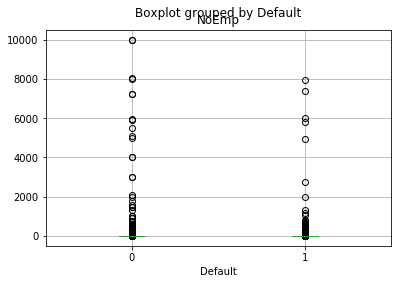

In [96]:
df_data1.boxplot(column='NoEmp',by='Default')

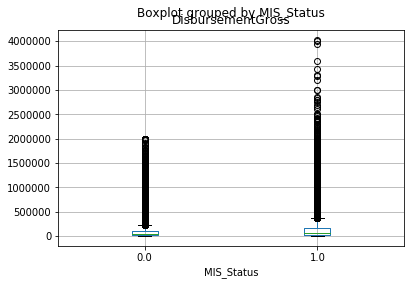

In [97]:
df_data1.boxplot(column='DisbursementGross', by = 'MIS_Status')

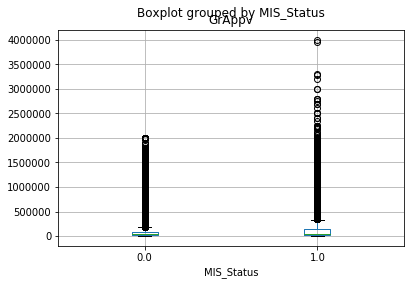

In [98]:
df_data1.boxplot(column = "GrAppv",by = "MIS_Status")

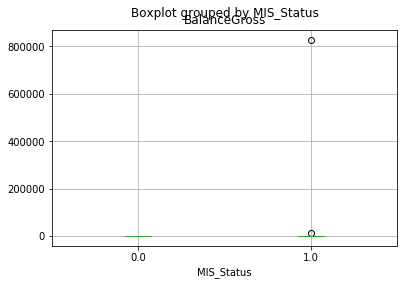

In [99]:
df_data1.boxplot(column = "BalanceGross",by = "MIS_Status")

In [100]:
#Now check some collinearity bw variables


In [101]:
df_data1.corr()

,Zip,CCSC,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Default
Zip,1.000000,-0.075084,-0.095580,0.148118,0.014771,-0.079057,0.014648,-0.000395,0.018416,-0.110019,0.010451,-0.012643,0.104686,0.001677,0.004295,0.025156,0.106495,0.116512,0.001039
CCSC,-0.075084,1.000000,0.705950,-0.353859,-0.049409,0.001256,0.010357,0.050399,-0.116234,0.619358,0.309769,-0.258508,-0.198698,0.001361,-0.156759,0.001335,-0.241268,-0.268012,-0.001052
ApprovalFY,-0.095580,0.705950,1.000000,-0.447960,-0.069961,0.027610,0.028481,0.067419,-0.076650,0.749811,0.379262,-0.274767,-0.210861,0.001852,-0.157232,-0.022691,-0.263326,-0.305633,-0.002216
Term,0.148118,-0.353859,-0.447960,1.000000,0.047236,-0.062044,0.056612,-0.004901,0.065750,-0.385952,-0.300033,-0.031447,0.492785,0.001335,0.380243,-0.060354,0.540744,0.575043,-0.002218
NoEmp,0.014771,-0.049409,-0.069961,0.047236,1.000000,-0.028583,0.023257,0.033384,0.006650,-0.053505,-0.026985,-0.007982,0.068730,-0.000210,0.019119,0.011457,0.070373,0.074792,-0.000495
NewExist,-0.079057,0.001256,0.027610,-0.062044,-0.028583,1.000000,0.013822,-0.029635,0.076829,0.026416,-0.016346,0.116160,-0.067581,0.003726,0.028136,-0.003056,-0.056671,-0.054663,-0.009380
CreateJob,0.014648,0.010357,0.028481,0.056612,0.023257,0.013822,1.000000,0.048554,0.011896,0.018583,-0.024305,-0.034470,0.096755,-0.000306,0.002737,0.035666,0.098156,0.123664,-0.002029
RetainedJob,-0.000395,0.050399,0.067419,-0.004901,0.033384,-0.029635,0.048554,1.000000,-0.003583,0.058434,0.022494,-0.039346,0.030617,-0.000349,-0.008357,0.013143,0.020312,0.021866,-0.001216
FranchiseCode,0.018416,-0.116234,-0.076650,0.065750,0.006650,0.076829,0.011896,-0.003583,1.000000,-0.083914,-0.086174,0.022778,0.093885,-0.000436,0.038133,0.017945,0.105632,0.104048,-0.000525
UrbanRural,-0.110019,0.619358,0.749811,-0.385952,-0.053505,0.026416,0.018583,0.058434,-0.083914,1.000000,0.350657,-0.350565,-0.220903,0.005039,-0.197747,0.022440,-0.270693,-0.296260,-0.004343


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


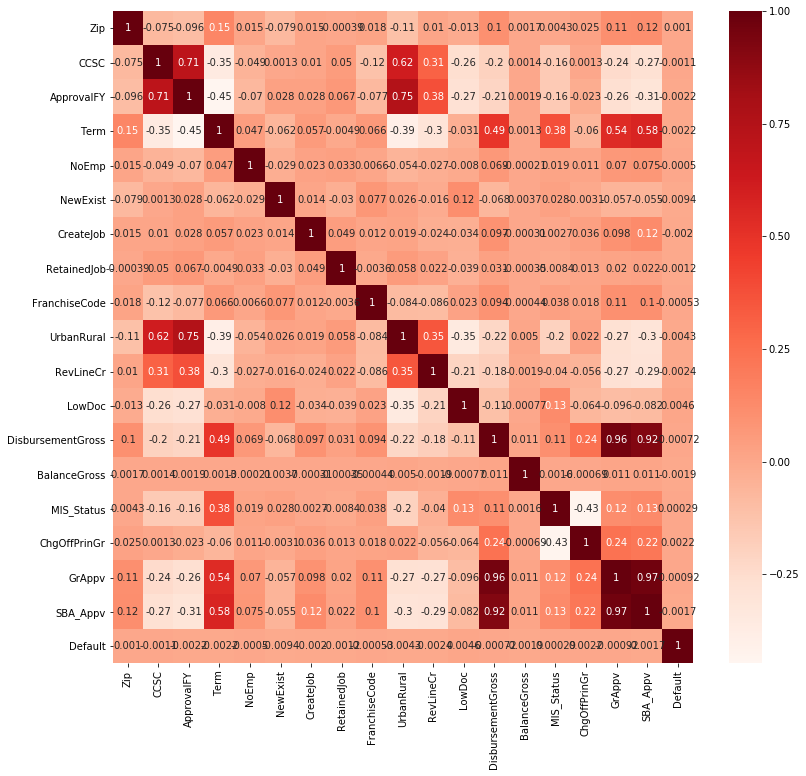

In [102]:
#Find correlation matrix

plt.figure(figsize=(13,12))
cor = df_data1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [103]:
# ApprovalFY,Zip,ccsc ,Name,City,State,zip,Bank,BankState ,ChgOffDate not good predictors that why drop these variables

In [104]:
df_datay = df_data1['MIS_Status']

In [105]:
df_data1=df_data1.drop(columns="MIS_Status",axis=1)

In [106]:
df_data1=df_data1.drop(columns="Name",axis=1)

In [107]:
df_data1=df_data1.drop(columns="City",axis=1)

In [108]:
df_data1=df_data1.drop(columns="State",axis=1)

In [109]:
df_data1=df_data1.drop(columns="Zip",axis=1)

In [110]:
df_data1=df_data1.drop(columns="Bank",axis=1)

In [111]:
df_data1=df_data1.drop(columns="BankState",axis=1)

In [112]:
df_data1=df_data1.drop(columns="CCSC",axis=1)

In [113]:
df_data1=df_data1.drop(columns='ApprovalFY',axis=1)

In [114]:
df_data1=df_data1.drop(columns='ChgOffDate',axis=1)

In [115]:
df_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149999 entries, 0 to 149998
Data columns (total 17 columns):
ApprovalDate         149999 non-null object
Term                 149999 non-null int64
NoEmp                149999 non-null int64
NewExist             149999 non-null int64
CreateJob            149999 non-null int64
RetainedJob          149999 non-null int64
FranchiseCode        149999 non-null int64
UrbanRural           149999 non-null int64
RevLineCr            149999 non-null float64
LowDoc               149999 non-null float64
DisbursementDate     149999 non-null object
DisbursementGross    149999 non-null float64
BalanceGross         149999 non-null float64
ChgOffPrinGr         149999 non-null float64
GrAppv               149999 non-null float64
SBA_Appv             149999 non-null float64
Default              149999 non-null int64
dtypes: float64(7), int64(8), object(2)
memory usage: 19.5+ MB


In [116]:
df_datax = df_data1

# Feature selection

In [164]:
from sklearn.feature_selection import f_classif  

In [176]:
#f_classif(df_datax,df_datay)

f_classif(df_datax,df_datay)


(array([3.78084546e+03, 2.53529503e+04, 5.48517430e+01, 1.18834459e+02,
        1.12374995e+00, 1.04774985e+01, 2.18434692e+02, 6.10416277e+03,
        2.42216674e+02, 2.39128325e+03, 3.40702480e+03, 1.80972370e+03,
        3.73253508e-01, 3.44494540e+04, 2.28164387e+03, 2.70894878e+03,
        1.27583040e-02]),
 array([0.00000000e+00, 0.00000000e+00, 1.30650381e-13, 1.16600637e-27,
        2.89114130e-01, 1.20863482e-03, 2.15100534e-49, 0.00000000e+00,
        1.42610503e-54, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.41237072e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.10068236e-01]))

In [177]:
p_values = f_classif(df_datax,df_datay)[1]
p_values

array([0.00000000e+00, 0.00000000e+00, 1.30650381e-13, 1.16600637e-27,
       2.89114130e-01, 1.20863482e-03, 2.15100534e-49, 0.00000000e+00,
       1.42610503e-54, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.41237072e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.10068236e-01])

In [178]:
p_values.round(3)  # P values

array([0.   , 0.   , 0.   , 0.   , 0.289, 0.001, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.541, 0.   , 0.   , 0.   , 0.91 ])

## Splitting a data 

In [118]:
df_datax.shape,df_datay.shape

((149999, 17), (149999,))

In [119]:
#The dataset is then split to the train and test set. The test size is set at 20%
from sklearn.model_selection import train_test_split
x, y = df_datax.values, df_datay.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [120]:
x_train.shape,y_train.shape

((119999, 17), (119999,))

In [121]:
x_test.shape,y_test.shape

((30000, 17), (30000,))

In [122]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(x)
#x_scaled = scaler.transform(x)

In [123]:
#x = sm.add_constant(x_scaled)
#reg_log = sm.Logit(y,x)
#results_log = reg_log.fit()

In [124]:
#results_log.summary()

## Model Making : Logistic,DecisonTree,RandomForest,NeuralNet

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
model = LogisticRegression()  # Logistic Regression

In [127]:
model.fit(x_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
model.coef_

array([[ 5.40722848e-04,  4.26381731e-05,  4.71553853e-07,
         4.13911774e-07,  2.14145712e-07,  4.90389918e-07,
         7.69326266e-06,  1.49023518e-07,  1.61325946e-07,
         1.07612026e-07,  5.40793049e-04,  1.21710095e-05,
         2.21380209e-07, -4.41562565e-04,  4.40277368e-05,
        -4.81173807e-05,  9.37519693e-08]])

In [129]:
model.intercept_

array([2.70038131e-07])

In [130]:
from sklearn.metrics import accuracy_score

In [131]:
predict_train = model.predict(x_train)
print('Target on train data',predict_train) 

Target on train data [0. 1. 1. ... 1. 1. 0.]


In [132]:
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.9701664180534838


In [133]:
predict_test = model.predict(x_test)
print('Target on train data',predict_test) 

Target on train data [0. 1. 0. ... 1. 1. 1.]


In [134]:
accuracy_train = accuracy_score(y_test,predict_test)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.9693666666666667


In [135]:
# Model is just fit not overfit or underfit

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)

In [137]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_scaled)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.106923
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.815     
Dependent Variable: y                AIC:              25695.2698
Date:               2020-02-12 16:21 BIC:              25860.0888
No. Observations:   119999           Log-Likelihood:   -12831.   
Df Model:           16               LL-Null:          -69426.   
Df Residuals:       119982           LLR p-value:      0.0000    
Converged:          0.0000           Scale:            1.0000    
No. Iterations:     35.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|    [0.025    0.975] 
------------------------------------------------------------------
x1         0.7416    0.0905     8.1899  0.0000    0.5641    0.9190
x2         1.9955    0.0349    57.1273  0.0000    1.9270    2.0640
x3        -0.0275    0.0089    -3.1080  0.0019   -0.0449   -0.0102
x4         0.0164    0.0166   

In [138]:
model.score(x_train,y_train)


0.9701664180534838

In [1]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier=DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=1)  # Decision Tree
dt_classifier.fit(x_train,y_train)


NameError: name 'x_train' is not defined

In [140]:
dt_classifier.score(x_train,y_train)

0.9999916665972216

In [141]:
predict_train = dt_classifier.predict(x_train)
print('Target on train data',predict_train) 

Target on train data [0. 1. 1. ... 1. 1. 0.]


In [142]:
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.9999916665972216


In [143]:
predict_test = dt_classifier.predict(x_test)
print('Target on test data',predict_test) 

Target on test data [0. 1. 0. ... 1. 1. 1.]


In [144]:
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.9817333333333333


In [145]:
##Confusion matrix ,recall,Precison

In [146]:
y_pred = model.predict(x_test)

In [147]:
from sklearn.metrics import classification_report,confusion_matrix

In [148]:
report = classification_report(y_test,y_pred)

In [149]:
report

'              precision    recall  f1-score   support\n\n         0.0       0.97      0.91      0.94      8037\n         1.0       0.97      0.99      0.98     21963\n\n    accuracy                           0.97     30000\n   macro avg       0.97      0.95      0.96     30000\nweighted avg       0.97      0.97      0.97     30000\n'

In [150]:
cm = confusion_matrix(y_test,y_pred)

In [151]:
cm

array([[ 7311,   726],
       [  193, 21770]], dtype=int64)

In [152]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()   # neural network

In [153]:
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [154]:
mlp.score(x_test,y_test)

0.9894666666666667

In [155]:
predict_train = mlp.predict(x_train)
print('Target on train data',predict_train) 

Target on train data [0. 1. 1. ... 1. 1. 0.]


In [156]:
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.9894749122909358


In [157]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)  # Random forest
rfc_classifier.fit(x_train, y_train)
rfc_classifier.score(x_test,y_test)

0.9904

In [158]:
predict_train = rfc_classifier.predict(x_train)
print('Target on train data',predict_train) 

Target on train data [0. 1. 1. ... 1. 1. 0.]


In [159]:
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.9999916665972216


# Boosting Alogorithm : Gradient Boosting Algorithm,Xgboost

In [160]:
from sklearn.ensemble import GradientBoostingClassifier

In [161]:
model = GradientBoostingClassifier()

# fit the model with the training data
model.fit(x_train,y_train)

# predict the target on the train dataset
predict_train = model.predict(x_train)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)




Target on train data [0. 1. 1. ... 1. 1. 0.]

accuracy_score on train dataset :  0.9911832598604988


In [ ]:
import xgboost as xgb